<a href="https://colab.research.google.com/github/ClaudeCoulombe/VIARENA/blob/master/Labos/Lab-Identification_Arbres/Id_arbre_reseau_convolutif-transfert_paufinage-colab.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Rappel - Fonctionnement d'un carnet web iPython

* Pour exécuter le code contenu dans une cellule d'un carnet iPython, cliquez dans la cellule et faites (⇧↵, shift-enter) 
* Le code d'un carnet iPython s'exécute séquentiellement de haut en bas de la page. Souvent, l'importation d'une bibliothèque Python ou l'initialisation d'une variable est préalable à l'exécution d'une cellule située plus bas. Il est donc recommandé d'exécuter les cellules en séquence. Enfin, méfiez-vous des retours en arrière qui peuvent réinitialiser certaines variables.

# Identification d'arbres à partir de leur écorce
## Réseau convolutif et apprentissage par transfert

##### Copyright 2019 The TensorFlow Authors.

In [7]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Apprentissage par transfert et paufinage

In [8]:
import os

In [51]:
# Note that we did not use Acer platanoides (2), Pinus rigida (15) and Populus grandidentata (18)
# since we did not collect enough images in these categories to obtain meaningful results.
data_ecorces = {
    'SAB': 1,  
#    'ERB': 2,  # Pas assez de spécimens - seulement 1
    'ERR': 3, 
    'ERS': 4, 
    'BOJ': 5, 
    'BOP': 6,
    'HEG': 7,  
    'FRA': 8, 
    'MEL': 9,  
    'OSV': 10, 
    'EPO': 11,
    'EPB': 12,
    'EPN': 13,
    'EPR': 14,
#    'PID': 15, # Pas assez de spécimens - seulement 4
    'PIR': 16, 
    'PIB': 17, 
#    'PEG': 18, # Pas assez de spécimens - seulement 3
    'PET': 19, 
    'CHR': 20,
    'THO': 21, 
    'PRU': 22, 
    'ORA': 23  
}

noms_arbres = {
            1: '\emph{Abies balsamea} - Sapin Baumier - Balsam fir',
#           2: '\emph{Acer platanoides} - Érable de Norvège - Norway maple',
            3: '\emph{Acer rubrum} - Érable rouge - Red maple',
            4: '\emph{Acer saccharum} - Érable à sucre - Sugar maple',
            5: '\emph{Betula alleghaniensis} - Bouleau jaune - Yellow birch',
            6: '\emph{Betula papyrifera} - Bouleau à papier - White birch',
            7: '\emph{Fagus grandifolia} - Hêtre à grandes feuilles - American beech',
            8: "\emph{Fraxinus americana} - Frêne d'Amérique - White ash",
            9: '\emph{Larix laricina} - Mélèze - Tamarack',
            10: '\emph{Ostrya virginiana} - Ostryer de Virginie - American hophornbeam',
            11: '\emph{Picea abies} - Épinette de Norvège - Norway spruce',
            12: '\emph{Picea glauca} - Épinette blanche - White spruce',
            13: '\emph{Picea mariana} - Épinette noire - Black spruce',
            14: '\emph{Picea rubens} - Épinette rouge - Red spruce',
#            15: '\emph{Pinus rigida} - Pin rigide - Pitch pine',
            16: '\emph{Pinus resinosa} - Pin rouge - Red pine',
            17: '\emph{Pinus strobus} - Pin blanc - Eastern white pine',
#            18: '\emph{Populus grandidentata} - Peuplier à grandes dents - Big-tooth aspen',
            19: '\emph{Populus tremuloides} - Peuplier faux tremble - Quaking aspen',
            20: '\emph{Quercus rubra} - Chêne rouge - Northern red oak',
            21: '\emph{Thuja occidentalis} - Thuya occidental - Northern white cedar',
            22: '\emph{Tsuga canadensis} - Pruche du Canada - Eastern Hemlock',
            23: "\emph{Ulmus americana} - Orme d'Amérique - American elm"
        }
print("Code executed")

Code executed


In [52]:
data_zip_urls_dict = {
   "BOJ":"https://drive.google.com/file/d/1d2zxg2pt5S8UJIK-E7IuWfGN0d1kxxMw/view?usp=sharing",
   "BOP":"https://drive.google.com/file/d/12cg6UO4HLnjk5fE_KXtrgdC2s8uGh4Zp/view?usp=sharing",
   "CHR":"https://drive.google.com/file/d/1Nq19-I-Q577KXMTFrkhlJDhMfclh0cWn/view?usp=sharing",
   "EPB":"https://drive.google.com/file/d/1K_Ncw8VEiuDZ_iJDbYToMq-GO5dzKHns/view?usp=sharing",
   "EPN":"https://drive.google.com/file/d/1S309DYmg76SrIA89aVQWXCMwm6CzhN8b/view?usp=sharing",
   "EPO":"https://drive.google.com/file/d/1fTKEcpYgmRg4spUpcH0FAiAnoRgANafL/view?usp=sharing",
   "EPR":"https://drive.google.com/file/d/1qRhtZ8LZjH_45fxetG7swg3ok3znk8CJ/view?usp=sharing",
#   "ERB":"https://drive.google.com/file/d/1ighbGniKAT_GrPm4RtsIAuN1STg9sjR9/view?usp=sharing", # Assez de données?
   "ERR":"https://drive.google.com/file/d/1rEo1thMNJTgFeTzTOfI11_FPSqMgbHSL/view?usp=sharing",
   "ERS":"https://drive.google.com/file/d/1ts-t7bOH9DfKj0q0v35nMgKHgVT0ZjyG/view?usp=sharing",
   "FRA":"https://drive.google.com/file/d/1yLacRGW7JtlFWV5asEXHpAToClL38D64/view?usp=sharing",
   "HEG":"https://drive.google.com/file/d/1zoJKEIrsCD1XxglgPJkEygumev1xRQ3U/view?usp=sharing",
   "MEL":"https://drive.google.com/file/d/1Wdy3DDnWfUysXjcIFFq12UFW7tlTYDT2/view?usp=sharing",
   "ORA":"https://drive.google.com/file/d/19_oYwCAaPfP6vMuqUnAzIQAa39Brxhfi/view?usp=sharing",
   "OSV":"https://drive.google.com/file/d/1VJCCZN1iwBK2Nzh_PHC9xvw63xiLuXXI/view?usp=sharing",
#   "PEG":"https://drive.google.com/file/d/1YUWH4IaTnmcoIAavZq8HyXByJxO7_zBg/view?usp=sharing", # Assez de données?
   "PET":"https://drive.google.com/file/d/13bMkvr_1mRz1TuOcX8-c-LfTSIsNKrve/view?usp=sharing",
   "PIB":"https://drive.google.com/file/d/17J9g1xm6-ji52k2pgJr7mUrJdS1ASSqP/view?usp=sharing",
#   "PID":"https://drive.google.com/file/d/12xswrf4pDmTAcYZDAY9D-0HniLjGJCxp/view?usp=sharing", # Assez de données?
   "PIR":"https://drive.google.com/file/d/1qny4meuoT-HYZ_KTyPQbQnzLhebkgkfU/view?usp=sharing",
   "PRU":"https://drive.google.com/file/d/1xQWHQvIbwRRBoi2F27q22_drUeM8m3S8/view?usp=sharing",
   "SAB":"https://drive.google.com/file/d/1ol2mlYAz5bMfQkwqcnxhCOg4avftYtRe/view?usp=sharing",
   "THO":"https://drive.google.com/file/d/1_mI0saGpfxb4wnhElCzxg0WU4OiFHkfP/view?usp=sharing",
  
}
data_zip_urls_dict

{'BOJ': 'https://drive.google.com/file/d/1d2zxg2pt5S8UJIK-E7IuWfGN0d1kxxMw/view?usp=sharing',
 'BOP': 'https://drive.google.com/file/d/12cg6UO4HLnjk5fE_KXtrgdC2s8uGh4Zp/view?usp=sharing',
 'CHR': 'https://drive.google.com/file/d/1Nq19-I-Q577KXMTFrkhlJDhMfclh0cWn/view?usp=sharing',
 'EPB': 'https://drive.google.com/file/d/1K_Ncw8VEiuDZ_iJDbYToMq-GO5dzKHns/view?usp=sharing',
 'EPN': 'https://drive.google.com/file/d/1S309DYmg76SrIA89aVQWXCMwm6CzhN8b/view?usp=sharing',
 'EPO': 'https://drive.google.com/file/d/1fTKEcpYgmRg4spUpcH0FAiAnoRgANafL/view?usp=sharing',
 'EPR': 'https://drive.google.com/file/d/1qRhtZ8LZjH_45fxetG7swg3ok3znk8CJ/view?usp=sharing',
 'ERR': 'https://drive.google.com/file/d/1rEo1thMNJTgFeTzTOfI11_FPSqMgbHSL/view?usp=sharing',
 'ERS': 'https://drive.google.com/file/d/1ts-t7bOH9DfKj0q0v35nMgKHgVT0ZjyG/view?usp=sharing',
 'FRA': 'https://drive.google.com/file/d/1yLacRGW7JtlFWV5asEXHpAToClL38D64/view?usp=sharing',
 'HEG': 'https://drive.google.com/file/d/1zoJKEIrsCD1XxglgPJ

In [53]:
# Création des répertoires de données
# Nous allons créer un répertoire de base `src` et des répertoiresnpour les données 
# d'entrainement, de validation et de test pour chaque étiquette cible

try:
    os.mkdir("/content/src/")
except OSError:
    pass
try:
    os.mkdir("/content/lab_id_arbres/")
except OSError:
    pass


In [15]:
# Référence: https://colab.research.google.com/notebooks/io.ipynb
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os
import shutil
import zipfile


In [16]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [17]:
nbr_classes = 0
for arbre_id in data_zip_urls_dict.keys():
    url = data_zip_urls_dict[arbre_id]
    id_fichier = url.split('/')[5]
    fichier = drive.CreateFile({'id':id_fichier})
    nom_fichier = arbre_id + ".zip"
    # télécharger le fichier nom_fichier
    fichier.GetContentFile("/content/src/" + nom_fichier)
    print("Fichier " + nom_fichier + " téléchargé")
    zip_ref = zipfile.ZipFile("/content/src/" + nom_fichier, 'r')
    zip_ref.extractall("/content/src")
    zip_ref.close()
    print("Fichier " + nom_fichier + " décompressé")
    try:
        os.remove("/content/src/"+nom_fichier)
        print("Fichier " + nom_fichier + " effacé")
    except:
        print("?")
    nbr_classes += 1
shutil.rmtree('/content/src/__MACOSX')
print("nbr_classes:",nbr_classes)

Fichier BOJ.zip téléchargé
Fichier BOJ.zip décompressé
Fichier BOJ.zip effacé
Fichier BOP.zip téléchargé
Fichier BOP.zip décompressé
Fichier BOP.zip effacé
Fichier CHR.zip téléchargé
Fichier CHR.zip décompressé
Fichier CHR.zip effacé
Fichier EPB.zip téléchargé
Fichier EPB.zip décompressé
Fichier EPB.zip effacé
Fichier EPN.zip téléchargé
Fichier EPN.zip décompressé
Fichier EPN.zip effacé
Fichier EPO.zip téléchargé
Fichier EPO.zip décompressé
Fichier EPO.zip effacé
Fichier EPR.zip téléchargé
Fichier EPR.zip décompressé
Fichier EPR.zip effacé
Fichier ERB.zip téléchargé
Fichier ERB.zip décompressé
Fichier ERB.zip effacé
Fichier ERR.zip téléchargé
Fichier ERR.zip décompressé
Fichier ERR.zip effacé
Fichier ERS.zip téléchargé
Fichier ERS.zip décompressé
Fichier ERS.zip effacé
Fichier FRA.zip téléchargé
Fichier FRA.zip décompressé
Fichier FRA.zip effacé
Fichier HEG.zip téléchargé
Fichier HEG.zip décompressé
Fichier HEG.zip effacé
Fichier MEL.zip téléchargé
Fichier MEL.zip décompressé
Fichier M

## Répartition des données

In [19]:
!pip3 install split-folders tqdm

### Visualisation d'un échantillon des données

In [20]:
# Répartition des données d'entraînement, de validation et de tests
import splitfolders
import pathlib

#### input dataset that want to split
input_folder = "/content/src"
output_folder= "/content/lab_id_arbres"
# => train, val, test

image_count = len(list(pathlib.Path(input_folder).glob('*/*.jpg')))
print("Nombre total d'images:",image_count)

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio = (0.80, 0.15, 0.05))

print("\nRépartition des données terminée!")

Nombre total d'images: 4013


Copying files: 4013 files [00:07, 561.08 files/s]


Répartition des données terminée!


__________________________________________________________________________________________
SAB  Sapin Baumier 
/content/lab_id_arbres/train/SAB/417_SAB_61_Nexus 5_20170608_104003_14.jpg
/content/lab_id_arbres/train/SAB/1004_SAB_116_GalaxyS5_20170622_113927_16.jpg
/content/lab_id_arbres/train/SAB/424_SAB_114_Nexus 5_20170615_135357_23.jpg
/content/lab_id_arbres/train/SAB/1002_SAB_75_GalaxyS5_20170622_113539_19.jpg


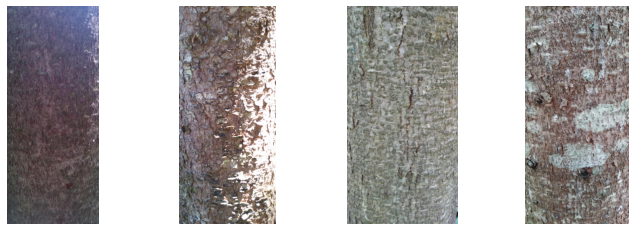

__________________________________________________________________________________________
ERB  Érable de Norvège 
/content/lab_id_arbres/train/ERB/541_ERB_70_GalaxyS5_20170607_151651_13.jpg
/content/lab_id_arbres/train/ERB/541_ERB_70_GalaxyS5_20170607_151651_39.jpg
/content/lab_id_arbres/train/ERB/541_ERB_70_GalaxyS5_20170607_151651_12.jpg


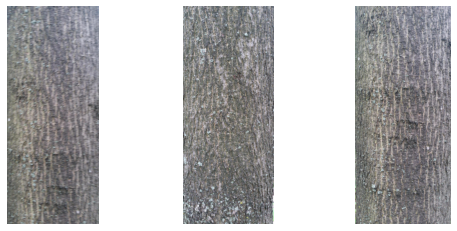

__________________________________________________________________________________________
ERR  Érable rouge 
/content/lab_id_arbres/train/ERR/560_ERR_208_GalaxyS7_20170922_130631_28.jpg
/content/lab_id_arbres/train/ERR/755_ERR_74_GalaxyS5_20170615_104119_13.jpg
/content/lab_id_arbres/train/ERR/556_ERR_84_GalaxyS7_20170922_125622_7.jpg
/content/lab_id_arbres/train/ERR/549_ERR_41_GalaxyS7_20170922_124124_15.jpg


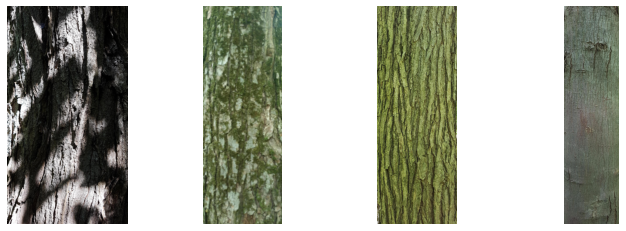

__________________________________________________________________________________________
ERS  Érable à sucre 
/content/lab_id_arbres/train/ERS/598_ERS_71_GalaxyS7_20170607_151119_9.jpg
/content/lab_id_arbres/train/ERS/596_ERS_214_GalaxyS5_20170607_135644_41.jpg
/content/lab_id_arbres/train/ERS/231_ERS_174_Nexus 5_20170804_094656_8.jpg
/content/lab_id_arbres/train/ERS/781_ERS_49_GalaxyS5_20170713_104344_24.jpg


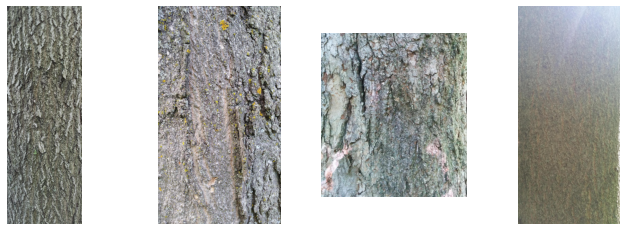

__________________________________________________________________________________________
BOJ  Bouleau jaune 
/content/lab_id_arbres/train/BOJ/654_BOJ_40_GalaxyS5_20170622_103118_3.jpg
/content/lab_id_arbres/train/BOJ/22_BOJ_76_Nexus 5_20170608_094815_5.jpg
/content/lab_id_arbres/train/BOJ/655_BOJ_41_GalaxyS5_20170622_103738_9.jpg
/content/lab_id_arbres/train/BOJ/658_BOJ_36_GalaxyS5_20170622_113427_8.jpg


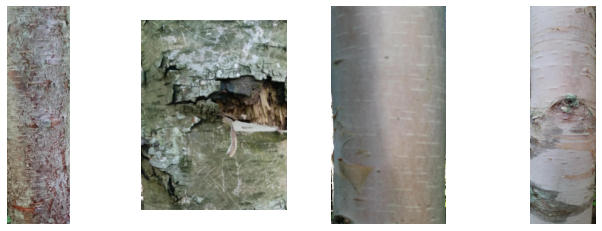

__________________________________________________________________________________________
BOP  Bouleau à papier 
/content/lab_id_arbres/train/BOP/471_BOP_63_GalaxyS7_20170607_153803_8.jpg
/content/lab_id_arbres/train/BOP/466_BOP_52_GalaxyS5_20170607_142711_28.jpg
/content/lab_id_arbres/train/BOP/665_BOP_81_GalaxyS5_20170712_102518_17.jpg
/content/lab_id_arbres/train/BOP/37_BOP_72_Nexus 5_20170810_120320_6.jpg


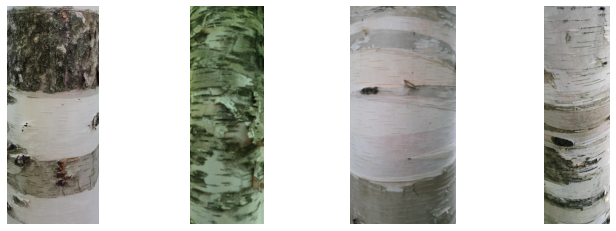

__________________________________________________________________________________________
HEG  Hêtre à grandes feuilles 
/content/lab_id_arbres/train/HEG/612_HEG_81_GalaxyS7_20170916_154613_2.jpg
/content/lab_id_arbres/train/HEG/796_HEG_93_GalaxyS5_20170615_103227_8.jpg
/content/lab_id_arbres/train/HEG/798_HEG_88_GalaxyS5_20170713_101954_15.jpg
/content/lab_id_arbres/train/HEG/624_HEG_53_GalaxyS7_20170916_180432_16.jpg


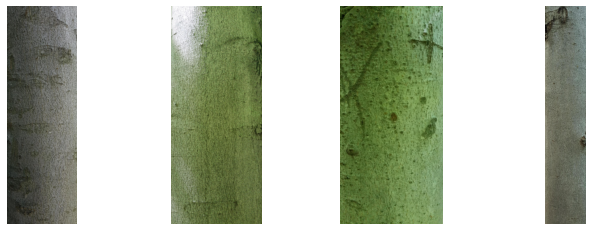

__________________________________________________________________________________________
FRA  Frêne d'Amérique 
/content/lab_id_arbres/train/FRA/791_FRA_124_GalaxyS5_20170713_103241_21.jpg
/content/lab_id_arbres/train/FRA/264_FRA_68_Nexus 5_20170804_103215_2.jpg
/content/lab_id_arbres/train/FRA/793_FRA_88_GalaxyS5_20170713_114530_7.jpg
/content/lab_id_arbres/train/FRA/250_FRA_144_Nexus 5_20170804_100422_4.jpg


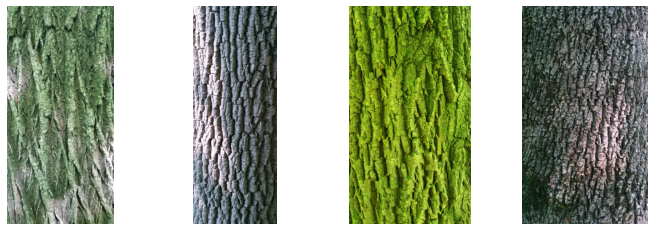

__________________________________________________________________________________________
MEL  Mélèze 
/content/lab_id_arbres/train/MEL/835_MEL_63_GalaxyS5_20170706_110140_3.jpg
/content/lab_id_arbres/train/MEL/845_MEL_83_GalaxyS5_20170706_112035_11.jpg
/content/lab_id_arbres/train/MEL/812_MEL_70_GalaxyS5_20170706_102401_18.jpg
/content/lab_id_arbres/train/MEL/853_MEL_90_GalaxyS5_20170706_113635_18.jpg


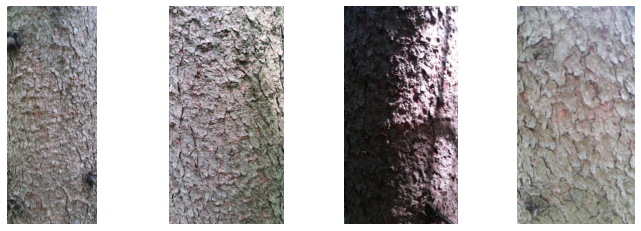

__________________________________________________________________________________________
OSV  Ostryer de Virginie 
/content/lab_id_arbres/train/OSV/304_OSV_94_Nexus 5_20170810_121919_3.jpg
/content/lab_id_arbres/train/OSV/900_OSV_46_GalaxyS5_20170713_122523_15.jpg
/content/lab_id_arbres/train/OSV/890_OSV_190_GalaxyS5_20170713_105525_10.jpg
/content/lab_id_arbres/train/OSV/888_OSV_105_GalaxyS5_20170713_104958_10.jpg


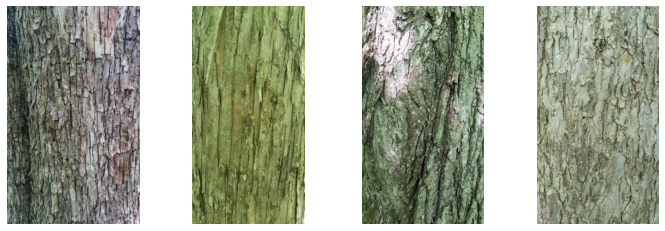

__________________________________________________________________________________________
EPO  Épinette de Norvège 
/content/lab_id_arbres/train/EPO/150_EPO_95_Nexus 5_20170921_154806_6.jpg
/content/lab_id_arbres/train/EPO/128_EPO_99_Nexus 5_20170921_151902_8.jpg
/content/lab_id_arbres/train/EPO/149_EPO_88_Nexus 5_20170921_154716_13.jpg
/content/lab_id_arbres/train/EPO/160_EPO_61_Nexus 5_20170922_100546_5.jpg


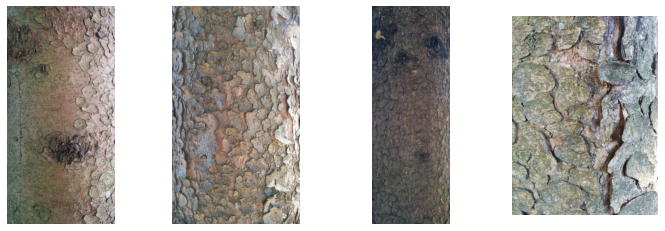

__________________________________________________________________________________________
EPB  Épinette blanche 
/content/lab_id_arbres/train/EPB/88_EPB_73_Nexus 5_20170817_110805_18.jpg
/content/lab_id_arbres/train/EPB/104_EPB_101_Nexus 5_20170817_113126_5.jpg
/content/lab_id_arbres/train/EPB/97_EPB_88_Nexus 5_20170817_112520_12.jpg
/content/lab_id_arbres/train/EPB/687_EPB_50_GalaxyS5_20170712_122637_5.jpg


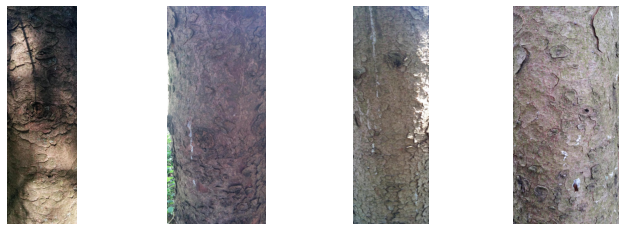

__________________________________________________________________________________________
EPN  Épinette noire 
/content/lab_id_arbres/train/EPN/731_EPN_132_GalaxyS5_20170622_113819_20.jpg
/content/lab_id_arbres/train/EPN/729_EPN_68_GalaxyS5_20170622_113012_20.jpg
/content/lab_id_arbres/train/EPN/698_EPN_107_GalaxyS5_20170622_100739_19.jpg
/content/lab_id_arbres/train/EPN/718_EPN_82_GalaxyS5_20170622_104828_17.jpg


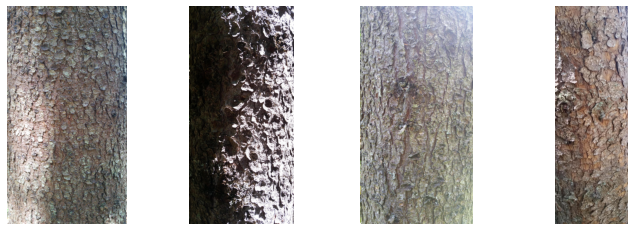

__________________________________________________________________________________________
EPR  Épinette rouge 
/content/lab_id_arbres/train/EPR/751_EPR_98_GalaxyS5_20170607_154932_4.jpg
/content/lab_id_arbres/train/EPR/754_EPR_89_GalaxyS5_20170615_133508_26.jpg
/content/lab_id_arbres/train/EPR/179_EPR_69_Nexus 5_20170608_102515_12.jpg
/content/lab_id_arbres/train/EPR/184_EPR_62_Nexus 5_20170608_103359_2.jpg


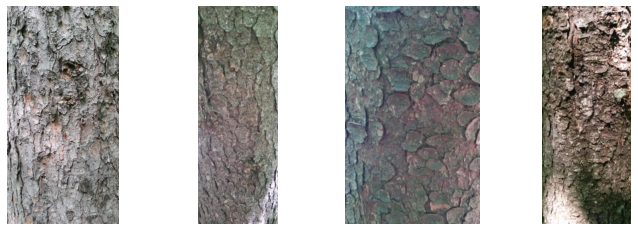

__________________________________________________________________________________________
PID  Pin rigide 
/content/lab_id_arbres/train/PID/347_PID_96_Nexus 5_20170817_103213_2.jpg
/content/lab_id_arbres/train/PID/346_PID_77_Nexus 5_20170817_103045_6.jpg
/content/lab_id_arbres/train/PID/348_PID_76_Nexus 5_20170817_103335_11.jpg
/content/lab_id_arbres/train/PID/346_PID_77_Nexus 5_20170817_103045_3.jpg


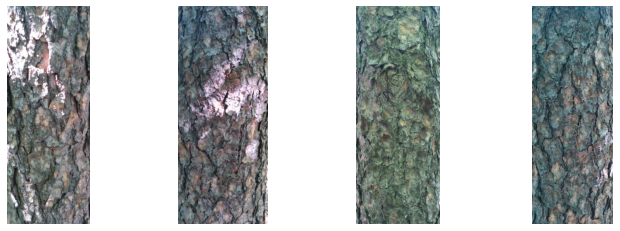

__________________________________________________________________________________________
PIR  Pin rouge 
/content/lab_id_arbres/train/PIR/373_PIR_99_Nexus 5_20170817_114348_10.jpg
/content/lab_id_arbres/train/PIR/354_PIR_119_Nexus 5_20170817_100942_19.jpg
/content/lab_id_arbres/train/PIR/360_PIR_103_Nexus 5_20170817_111914_4.jpg
/content/lab_id_arbres/train/PIR/358_PIR_88_Nexus 5_20170817_110336_8.jpg


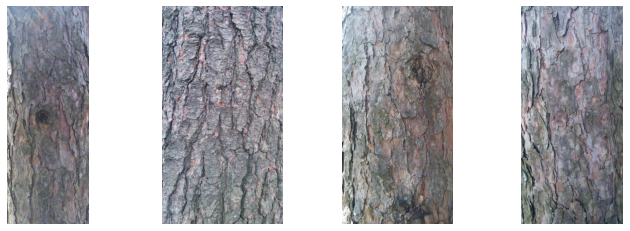

__________________________________________________________________________________________
PIB  Pin blanc 
/content/lab_id_arbres/train/PIB/327_PIB_89_Nexus 5_20170615_124707_15.jpg
/content/lab_id_arbres/train/PIB/337_PIB_137_Nexus 5_20170615_132622_8.jpg
/content/lab_id_arbres/train/PIB/967_PIB_107_GalaxyS5_20170615_131100_18.jpg
/content/lab_id_arbres/train/PIB/335_PIB_59_Nexus 5_20170615_132024_8.jpg


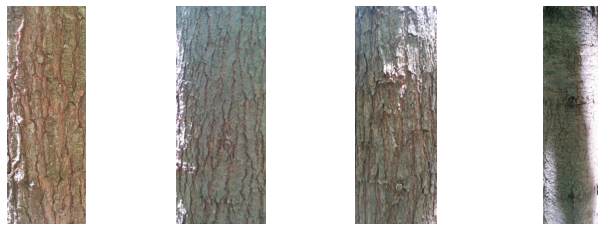

__________________________________________________________________________________________
PEG  Peuplier à grandes dents 
/content/lab_id_arbres/train/PEG/906_PEG_55_GalaxyS5_20170713_112557_7.jpg
/content/lab_id_arbres/train/PEG/904_PEG_43_GalaxyS5_20170713_111959_6.jpg
/content/lab_id_arbres/train/PEG/905_PEG_46_GalaxyS5_20170713_112124_24.jpg
/content/lab_id_arbres/train/PEG/905_PEG_46_GalaxyS5_20170713_112124_19.jpg


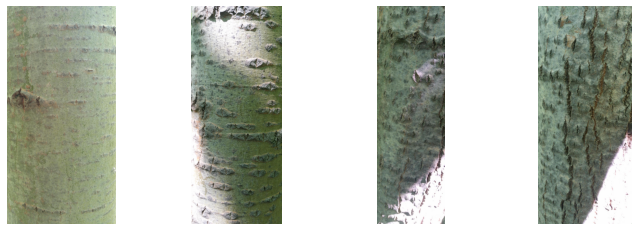

__________________________________________________________________________________________
PET  Peuplier faux tremble 
/content/lab_id_arbres/train/PET/939_PET_63_GalaxyS5_20170712_112348_3.jpg
/content/lab_id_arbres/train/PET/928_PET_69_GalaxyS5_20170712_110018_17.jpg
/content/lab_id_arbres/train/PET/911_PET_110_GalaxyS5_20170712_102054_6.jpg
/content/lab_id_arbres/train/PET/952_PET_70_GalaxyS5_20170712_114521_17.jpg


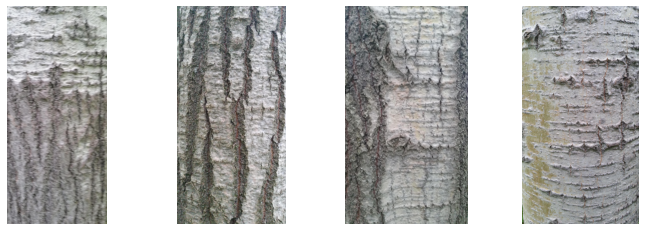

__________________________________________________________________________________________
CHR  Chêne rouge 
/content/lab_id_arbres/train/CHR/520_CHR_188_GalaxyS7_20170916_181952_16.jpg
/content/lab_id_arbres/train/CHR/62_CHR_86_Nexus 5_20170906_095927_4.jpg
/content/lab_id_arbres/train/CHR/69_CHR_135_Nexus 5_20170906_100537_4.jpg
/content/lab_id_arbres/train/CHR/81_CHR_87_Nexus 5_20170906_105637_3.jpg


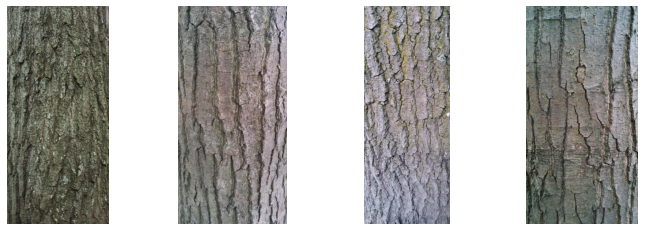

__________________________________________________________________________________________
THO  Thuya occidental 
/content/lab_id_arbres/train/THO/441_THO_108_Nexus 5_20170810_102111_10.jpg
/content/lab_id_arbres/train/THO/428_THO_48_Nexus 5_20170615_122838_2.jpg
/content/lab_id_arbres/train/THO/455_THO_97_Nexus 5_20170810_104017_7.jpg
/content/lab_id_arbres/train/THO/431_THO_60_Nexus 5_20170615_134430_2.jpg


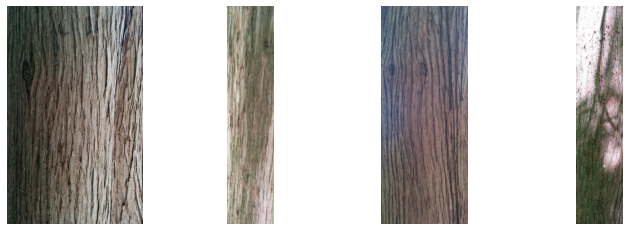

__________________________________________________________________________________________
PRU  Pruche du Canada 
/content/lab_id_arbres/train/PRU/376_PRU_160_GalaxyS7_20170607_155417_11.jpg
/content/lab_id_arbres/train/PRU/399_PRU_76_Nexus 5_20170906_091929_21.jpg
/content/lab_id_arbres/train/PRU/386_PRU_173_Nexus 5_20170608_100544_18.jpg
/content/lab_id_arbres/train/PRU/393_PRU_104_Nexus 5_20170906_091302_18.jpg


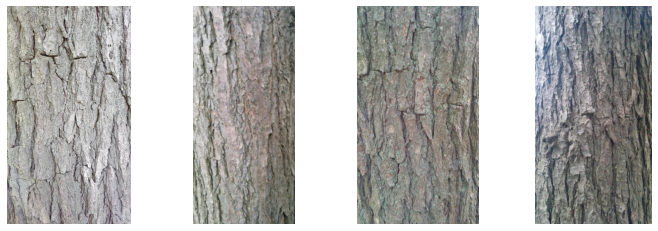

__________________________________________________________________________________________
ORA  Orme d'Amérique 
/content/lab_id_arbres/train/ORA/288_ORA_76_Nexus 5_20170810_104740_6.jpg
/content/lab_id_arbres/train/ORA/299_ORA_167_Nexus 5_20170810_115838_13.jpg
/content/lab_id_arbres/train/ORA/293_ORA_110_Nexus 5_20170810_105638_8.jpg
/content/lab_id_arbres/train/ORA/885_ORA_106_GalaxyS5_20170712_103027_9.jpg


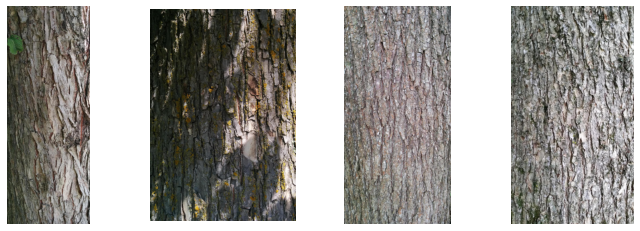

In [21]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 4

TRAINING_DIR = "/content/lab_id_arbres/train/"

for arbre_id in data_ecorces.keys():
    try:
        dir_path = os.path.join(TRAINING_DIR,arbre_id+os.sep)
        liste_fichiers = os.listdir(os.path.join(TRAINING_DIR,arbre_id+os.sep))
        next_two_pics = [os.path.join(dir_path, fname) for fname in liste_fichiers[0:pic_index]]
        fig = plt.figure(figsize=(12,4))
        print("_"*90)
        print(arbre_id,noms_arbres[data_ecorces[arbre_id]].split('-')[1])
        for i, img_path in enumerate(next_two_pics):
            print(img_path)
            img = mpimg.imread(img_path)
            plt.subplot(1,pic_index,i+1)
            plt.imshow(img)
            plt.axis('Off')
        plt.show()
    except:
        continue

### Création de flux de lots de données pour l'entraînement

Chargeons ces images en mémoire en créant des `tf.data.dataset` à l'aide de l'utilitaire `tf.keras.utils.image_dataset_from_directory`. 

In [23]:
import os

import keras
print("Keras version:",keras.__version__)
import tensorflow as tf
print("TensorFlow version:",tf.__version__)

Keras version: 2.7.0
TensorFlow version: 2.7.0


In [26]:
TRAINING_DIR = "/content/lab_id_arbres/train/"
VALIDATION_DIR = "/content/lab_id_arbres/val"
TESTING_DIR = "/content/lab_id_arbres/test/"

BATCH_SIZE = 32
IMG_SIZE = (150, 150)

train_dataset = tf.keras.utils.image_dataset_from_directory(TRAINING_DIR,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 3199 files belonging to 23 classes.


In [25]:
id_classes = train_dataset.class_names
print(id_classes)
print(len(id_classes))

['BOJ', 'BOP', 'CHR', 'EPB', 'EPN', 'EPO', 'EPR', 'ERB', 'ERR', 'ERS', 'FRA', 'HEG', 'MEL', 'ORA', 'OSV', 'PEG', 'PET', 'PIB', 'PID', 'PIR', 'PRU', 'SAB', 'THO']
23


In [27]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(TRAINING_DIR,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 3199 files belonging to 23 classes.


In [28]:
test_dataset = tf.keras.utils.image_dataset_from_directory(TESTING_DIR,
                                                           batch_size=BATCH_SIZE,
                                                           image_size=IMG_SIZE)

Found 223 files belonging to 23 classes.


In [29]:
print('Number of training batches: %d' % tf.data.experimental.cardinality(train_dataset))
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of training batches: 100
Number of validation batches: 100
Number of test batches: 7


In [31]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)


### Normalisation des données

In [32]:
import numpy as np

# Create new data input
inputs = keras.Input(shape=(150, 150, 3))
# Apply random data augmentation
#inputs = data_augmentation(inputs)  

# Pre-trained Xception weights requires that input be scaled
# from (0, 255) to a range of (-1., +1.), the rescaling layer
# outputs: `(inputs * scale) + offset`

# data_augmentation = keras.Sequential(
#     [layers.RandomFlip("horizontal"), layers.RandomRotation(0.1),]
# )
# inputs = data_augmentation(inputs)  # Apply random data augmentation

scale_layer = keras.layers.Rescaling(1.0/255)
normalized_train_dataset = train_dataset.map(lambda x, y: (scale_layer(x), y))
image_batch, labels_batch = next(iter(normalized_train_dataset))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [36]:
normalized_validation_dataset = validation_dataset.map(lambda x, y: (scale_layer(x), y))
image_batch, labels_batch = next(iter(normalized_validation_dataset))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.05168167 1.0


In [37]:
normalized_test_dataset = test_dataset.map(lambda x, y: (scale_layer(x), y))
image_batch, labels_batch = next(iter(normalized_test_dataset))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0023055107 1.0


# Création d'un modèle d'apprentissage par transfert

## Importation d'un modèle inception pré-entraîné

In [38]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-02-01 04:58:24--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 142.250.157.128, 142.251.8.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  69.1MB/s    in 1.2s    

2022-02-01 04:58:26 (69.1 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [40]:
from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow.keras.applications.inception_v3 import InceptionV3

# Load weights pre-trained on ImageNet
pre_trained_model = InceptionV3(weights='imagenet',  
                                input_shape = (150, 150, 3), 
                                include_top = False)

pre_trained_model.summary()


Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 74, 74, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 74, 74, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                       

In [41]:
## local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
# pre_trained_model.load_weights(local_weights_file)

pre_trained_model.trainable = True

# Let's take a look to see how many layers are in the pretrained model
nbr_layers_pretrained_model = len(pre_trained_model.layers)
print("Nombre de couches dans le modèle pré-entraîné d'origine: ", nbr_layers_pretrained_model)

# How to get the layer index from the layer name
# https://www.thetopsites.net/article/50151157.shtml
layer_names = [layer.name for layer in pre_trained_model.layers]
last_layer_name = layer_names[-1]
print("Nom de la dernière couche du modèle pré-entraîné complet:",last_layer_name)
last_layer_index = layer_names.index(last_layer_name)
# Choix d'une nouvelle couche de sortie par essai / erreur
# last_layer_name = 'mixed5'
last_layer_name = 'mixed10'
print("Choix empirique de la dernière du modèle pré-entraîné:",last_layer_name)
last_layer_index = layer_names.index(last_layer_name)
print("Index de la dernière couche du modèle pré-entraîné:",last_layer_index)
# Choix de la dernière couche non-entraînable ou dernière couche « gelée »
# last_layer_frozen_name = 'mixed3'
last_layer_frozen_name = 'mixed10'
print("Choix empirique de la dernière couche non-entraînable:",last_layer_frozen_name)
last_layer_frozen_index = layer_names.index(last_layer_frozen_name)
print("Index de la dernière couche non-entraînable:",last_layer_frozen_index)
# Fine-tune from this layer onwards
fine_tune_at = last_layer_frozen_index
print("Nombre de couches non entraînables dans le modèle préentraîné: ", fine_tune_at )
# Freeze all the layers before the `fine_tune_at` layer
for layer in pre_trained_model.layers[:fine_tune_at]:
    layer.trainable =  False

print("Nombre de couches entraînables dans le modèle préentraîné: ", last_layer_index-fine_tune_at)
last_layer = pre_trained_model.get_layer(last_layer_name)
print('Dimensions de la dernière couche: ', last_layer.output_shape)
last_output = last_layer.output

Nombre de couches dans le modèle pré-entraîné d'origine:  311
Nom de la dernière couche du modèle pré-entraîné complet: mixed10
Choix empirique de la dernière du modèle pré-entraîné: mixed10
Index de la dernière couche du modèle pré-entraîné: 310
Choix empirique de la dernière couche non-entraînable: mixed10
Index de la dernière couche non-entraînable: 310
Nombre de couches non entraînables dans le modèle préentraîné:  310
Nombre de couches entraînables dans le modèle préentraîné:  0
Dimensions de la dernière couche:  (None, 3, 3, 2048)


In [43]:
# Flatten the output layer to 1 dimension
outputs = layers.Dropout(0.2)(last_output)
outputs = layers.Flatten()(outputs)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
outputs = layers.Dense(1024, activation='relu')(outputs)
# Add a dropout rate of 0.5
outputs = layers.Dropout(0.5)(outputs)      
# Add a final softmax layer for classification
# *** IMPORTANT *** 23 classes
number_of_target_class = 23
outputs = layers.Dense(number_of_target_class, activation='softmax')(outputs)           

transfer_model = Model(pre_trained_model.input, outputs) 
print("Number of layers in the learning transfer model: ", len(transfer_model.layers))


Number of layers in the learning transfer model:  316


In [44]:
transfer_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 74, 74, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 74, 74, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                            

In [45]:
len(transfer_model.trainable_variables)


4

## Compilation du modèle

In [46]:
from tensorflow.keras.optimizers import RMSprop

# According to tf.keras.utils.image_dataset_from_directory documentation, 'int' is the default label_mode
# 'int': means that the labels are encoded as integers (e.g. for sparse_categorical_crossentropy loss)
# So, by default, tf.keras.utils.image_dataset_from_directory will create a set of labels for the dataset 
# as integer that go from 1 to the number of classes in the dataset.
# In this case, the model should be compiled with a 'sparse_categorical_crossentropy' loss.
transfer_model.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

print("Modèle compilé!")

Modèle compilé!


## Entraînement du modèle

In [47]:
initial_epochs = 10
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

# Callbacks are passed to the model via the callbacks argument in fit, 
# which takes a list of callbacks. You can pass any number of callbacks.
callbacks_list = [
    # # Interrupts training when improvement stops
    # keras.callbacks.EarlyStopping(
    #     # Monitors the model’s validation accuracy
    #     monitor='val_accuracy',
    #     # Interrupts training when accuracy has stopped 
    #     # improving for more than one epoch (that is, two epochs)
    #     patience=2,
    # ),
    keras.callbacks.ReduceLROnPlateau(
        # Monitors the model’s validation loss
        monitor='val_loss',
        # Divides the learning rate by 2 when triggered
        factor=0.5,
        # The callback is triggered after the validation loss 
        # has stopped improving for 1 epochs.
        patience=1,
    ) 
]
history_fine = transfer_model.fit(normalized_train_dataset,
                                  validation_data = normalized_validation_dataset,
                                  epochs = total_epochs,
                                  callbacks=callbacks_list,
                                  verbose = 2)


Epoch 1/20
100/100 - 60s - loss: 2.2536 - accuracy: 0.3592 - val_loss: 1.1877 - val_accuracy: 0.6962 - lr: 1.0000e-04 - 60s/epoch - 596ms/step
Epoch 2/20
100/100 - 7s - loss: 1.3609 - accuracy: 0.5924 - val_loss: 0.7457 - val_accuracy: 0.8068 - lr: 1.0000e-04 - 7s/epoch - 67ms/step
Epoch 3/20
100/100 - 7s - loss: 0.9268 - accuracy: 0.7205 - val_loss: 0.4835 - val_accuracy: 0.8884 - lr: 1.0000e-04 - 7s/epoch - 66ms/step
Epoch 4/20
100/100 - 7s - loss: 0.6580 - accuracy: 0.8018 - val_loss: 0.2981 - val_accuracy: 0.9478 - lr: 1.0000e-04 - 7s/epoch - 66ms/step
Epoch 5/20
100/100 - 7s - loss: 0.4767 - accuracy: 0.8756 - val_loss: 0.2161 - val_accuracy: 0.9572 - lr: 1.0000e-04 - 7s/epoch - 66ms/step
Epoch 6/20
100/100 - 7s - loss: 0.3467 - accuracy: 0.9075 - val_loss: 0.1308 - val_accuracy: 0.9900 - lr: 1.0000e-04 - 7s/epoch - 66ms/step
Epoch 7/20
100/100 - 7s - loss: 0.2588 - accuracy: 0.9384 - val_loss: 0.0878 - val_accuracy: 0.9941 - lr: 1.0000e-04 - 7s/epoch - 66ms/step
Epoch 8/20
100/10

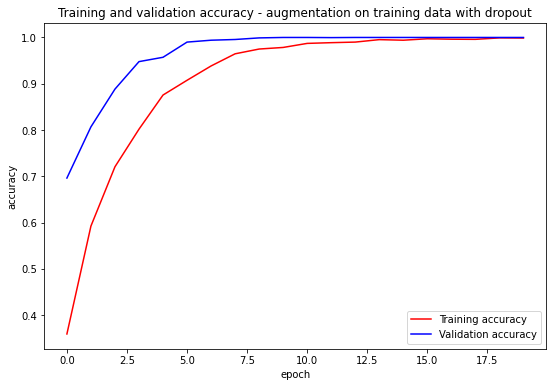

In [48]:
# dernière couche 'mixed10', dernière couche gelée 'mixed10'
# 20 epochs
# Test accuracy : 0.
import matplotlib.pyplot as plt
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']
loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']
epochs = range(len(acc))
golden_number = 1.618
height = 6
length = int(golden_number * height)
plt.figure(figsize=(length,height))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy - augmentation on training data with dropout')
plt.legend(loc=0)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [ ]:
# dernière couche 'mixed5', dernière couche gelée 'mixed3'
# 20 epochs
# Test accuracy : 0.7425742745399475
import matplotlib.pyplot as plt
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']
loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']
epochs = range(len(acc))
golden_number = 1.618
height = 6
length = int(golden_number * height)
plt.figure(figsize=(length,height))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy - augmentation on training data with dropout')
plt.legend(loc=0)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()


In [49]:
loss, accuracy = transfer_model.evaluate(normalized_test_dataset)
print('Test accuracy :', accuracy)

7/7 [==============================] - 2s 36ms/step - loss: 2.2468 - accuracy: 0.5650
Test accuracy : 0.5650224089622498


In [ ]:
print("Fin de l'exécution du carnet IPython")